In [ ]:

#Problem Statement :
#This dataset contains about 10 years of daily weather observations from many locations across Australia.
#RainTomorrow is the target variable to predict. It means -- did it rain the next day, Yes or No? 
#This column is Yes if the rain for that day was 1mm or more. 
#Predict next-day rain by training classification models on the target variable RainTomorrow.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv("/content/weatherAUS.csv")
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [ ]:
df.head()  #to show top 5

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
df.shape   #how many rows and columns

(145460, 23)

In [ ]:
#to chcke null values
df.isnull().sum()


Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

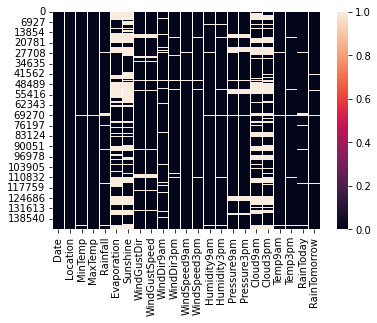

In [ ]:
sns.heatmap(df.isnull())
plt.show()

In [ ]:
#now to chcek the data types
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [ ]:
#first swork on categorical means object type of columns
s=(df.dtypes=='object')  #give data types
df_cat=list(s[s].index)   #to convert in list
print("categrical columns")
print(df_cat)

categrical columns
['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [ ]:
#now we checkl the null values in categorical columns
for i in df_cat:
  print(i,df[i].isnull().sum())  #because it is list we cannot write df_cat.isnull().sum() we need to use loop

Date 0
Location 0
WindGustDir 10326
WindDir9am 10566
WindDir3pm 4228
RainToday 3261
RainTomorrow 3267


In [ ]:
#now we will fill this null values with mode because object null values are fullfill with mode
for i in df_cat:
  df[i].fillna(df[i].mode()[0],inplace=True)

In [ ]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir          0
WindGustSpeed    10263
WindDir9am           0
WindDir3pm           0
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday            0
RainTomorrow         0
dtype: int64

In [ ]:
#now we will do for numerical columns
t=(df.dtypes=='float64')
df_num=list(t[t].index)
print("Numerical type of columns")
print(df_num)

Numerical type of columns
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [ ]:
#To check null values()
for i in df_num:
  print(i,df[i].isnull().sum())

MinTemp 1485
MaxTemp 1261
Rainfall 3261
Evaporation 62790
Sunshine 69835
WindGustSpeed 10263
WindSpeed9am 1767
WindSpeed3pm 3062
Humidity9am 2654
Humidity3pm 4507
Pressure9am 15065
Pressure3pm 15028
Cloud9am 55888
Cloud3pm 59358
Temp9am 1767
Temp3pm 3609


In [ ]:
#fill null values with median
for i in df_num:
  df[i].fillna(df[i].median(),inplace=True)

In [ ]:
#again to chck he null values
for i in df_num:
  print(i,df[i].isnull().sum())

MinTemp 0
MaxTemp 0
Rainfall 0
Evaporation 0
Sunshine 0
WindGustSpeed 0
WindSpeed9am 0
WindSpeed3pm 0
Humidity9am 0
Humidity3pm 0
Pressure9am 0
Pressure3pm 0
Cloud9am 0
Cloud3pm 0
Temp9am 0
Temp3pm 0


In [ ]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

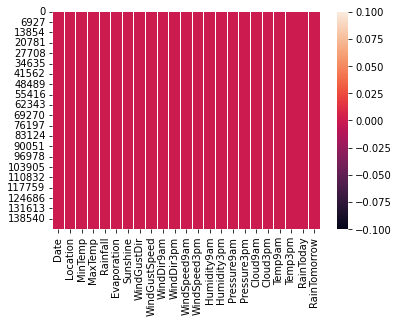

In [ ]:
sns.heatmap(df.isnull())  #now there is no null values
plt.show()

In [ ]:
#now we check the data typpes
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

Visualization

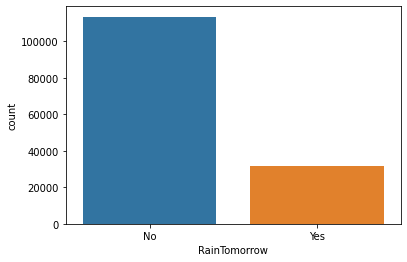

In [ ]:
sns.countplot(data=df,x= "RainTomorrow")
plt.show()

In [ ]:
#plt.figure(figsize=(18,18))
#sns.heatmap(df.corr(),annot=True)
#plt.show()

Modelling

In [ ]:
#apply Label encoder on catgorical data
from sklearn.preprocessing import LabelEncoder

In [ ]:
#create the object for LabelEncoder
le=LabelEncoder()
for i in df_cat:
  df[i]=le.fit_transform(df[i])
   

In [ ]:
df.head() #to check encoding

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,396,2,13.4,22.9,0.6,4.8,8.4,13,44.0,13,...,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,0,0
1,397,2,7.4,25.1,0.0,4.8,8.4,14,44.0,6,...,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,0,0
2,398,2,12.9,25.7,0.0,4.8,8.4,15,46.0,13,...,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,0,0
3,399,2,9.2,28.0,0.0,4.8,8.4,4,24.0,9,...,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,0,0
4,400,2,17.5,32.3,1.0,4.8,8.4,13,41.0,1,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0


In [ ]:
#seperate input and output
X=df.drop("RainTomorrow",axis=1)  #input
Y=df["RainTomorrow"]  #output

In [ ]:
#train _test_split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [ ]:
X_train.shape  #70% data

(101822, 22)

In [ ]:
X_test.shape#30% data

(43638, 22)

In [ ]:
#StandardScaler
#appling scaling on input
from sklearn.preprocessing import StandardScaler
#create the object of StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [ ]:
 #to check scaling

In [ ]:
#to check data balance or not
df["RainTomorrow"].value_counts()   #data is unbalanced

0    113583
1     31877
Name: RainTomorrow, dtype: int64

In [ ]:
# ! pip install imblearn
from imblearn.over_sampling import RandomOverSampler
ros =  RandomOverSampler()
X_train,Y_train = ros.fit_resample(X_train,Y_train)
X_test,Y_test = ros.fit_resample(X_test,Y_test)

In [ ]:
pd.Series(Y_train).value_counts()   #to check the  balance or not

0    79368
1    79368
Name: RainTomorrow, dtype: int64

In [ ]:
pd.Series(Y_test).value_counts()  #to check the  balance or not

0    34215
1    34215
Name: RainTomorrow, dtype: int64

In [ ]:
#Create neural Network
import tensorflow as tf
model=tf.keras.Sequential([tf.keras.layers.Dense(units=20,activation="relu",input_shape=(X.shape[1],)),
                           tf.keras.layers.Dense(units=16,activation="relu"),
                           tf.keras.layers.Dense(units=1,activation="sigmoid")])



In [ ]:
#compile the model
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])


In [ ]:
#create the early stopping to prevent from the overfitting due to epochs(iteration)
#means we create call back
from tensorflow.keras.callbacks import EarlyStopping
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)


In [ ]:
#trained the model
trained_model=model.fit(X_train,Y_train,batch_size=32,epochs=50,validation_data=(X_test,Y_test),callbacks=callback)

Epoch 1/50
4961/4961 [==============================] - 18s 3ms/step - loss: 0.4667 - accuracy: 0.7752 - val_loss: 0.4523 - val_accuracy: 0.7868
Epoch 2/50
4961/4961 [==============================] - 12s 2ms/step - loss: 0.4466 - accuracy: 0.7896 - val_loss: 0.4474 - val_accuracy: 0.7900
Epoch 3/50
4961/4961 [==============================] - 12s 3ms/step - loss: 0.4410 - accuracy: 0.7927 - val_loss: 0.4452 - val_accuracy: 0.7924
Epoch 4/50
4961/4961 [==============================] - 12s 2ms/step - loss: 0.4385 - accuracy: 0.7945 - val_loss: 0.4456 - val_accuracy: 0.7921
Epoch 5/50
4961/4961 [==============================] - 12s 2ms/step - loss: 0.4364 - accuracy: 0.7956 - val_loss: 0.4448 - val_accuracy: 0.7922
Epoch 6/50
4961/4961 [==============================] - 12s 2ms/step - loss: 0.4352 - accuracy: 0.7961 - val_loss: 0.4442 - val_accuracy: 0.7933
Epoch 7/50
4961/4961 [==============================] - 12s 2ms/step - loss: 0.4338 - accuracy: 0.7968 - val_loss: 0.4447 - val_ac

In [ ]:
print("Training Loss and Training Accuracy:  ",model.evaluate(X_train,Y_train))  #training 
print("Testing Loss and Testing Accuracy:  ",model.evaluate(X_test,Y_test)) #testing


4961/4961 [==============================] - 7s 1ms/step - loss: 0.4214 - accuracy: 0.8037
Training Loss and Training Accuracy:   [0.4214451014995575, 0.8037496209144592]
2139/2139 [==============================] - 4s 2ms/step - loss: 0.4427 - accuracy: 0.7940
Testing Loss and Testing Accuracy:   [0.4427163898944855, 0.7940376996994019]


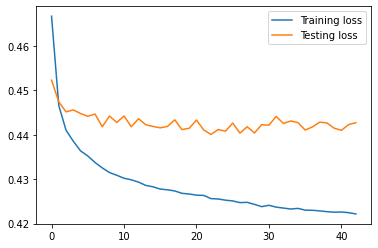

In [ ]:
#now visualize the training and testing loss
plt.plot(trained_model.history["loss"],label="Training loss")
plt.plot(trained_model.history["val_loss"],label="Testing loss")
plt.legend()
plt.show()

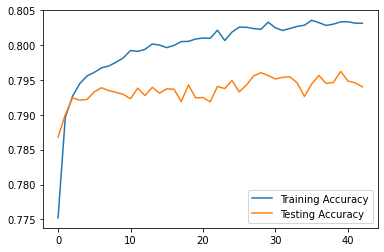

In [ ]:
#Visualize  for Accuracy 
plt.plot(trained_model.history['accuracy'],label="Training Accuracy")
plt.plot(trained_model.history['val_accuracy'],label="Testing Accuracy")
plt.legend()
plt.show()             

In [ ]:
#testing the model
Y_pred=model.predict(X_test).round(2)
Y_pred

2139/2139 [==============================] - 3s 1ms/step


array([[0.24],
       [0.34],
       [0.74],
       ...,
       [0.94],
       [0.81],
       [0.96]], dtype=float32)

In [ ]:
Y_pred=np.where(Y_pred>=0.5,1,0)   #to give predicted output in 0 &1
Y_pred

array([[0],
       [0],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.79      0.80      0.80     34215
           1       0.80      0.79      0.79     34215

    accuracy                           0.79     68430
   macro avg       0.79      0.79      0.79     68430
weighted avg       0.79      0.79      0.79     68430

[[27467  6748]
 [ 7349 26866]]


In [ ]:
#so there is overfitting in the model so we use regularizers
from keras import regularizers
#from keras.layers import Dropout
model1=tf.keras.Sequential([tf.keras.layers.Dense(units=20,activation="relu",input_shape=(X.shape[1],),
                                                  kernel_regularizer=regularizers.l2(0.01)),
                           tf.keras.layers.Dense(units=16,activation="relu",
                                                  kernel_regularizer=regularizers.l2(0.01)),
                           tf.keras.layers.Dense(units=1,activation="sigmoid",
                                                 kernel_regularizer=regularizers.l2(0.01))])


In [ ]:
#model.compile
model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
#train the model
trained_model1=model1.fit(X_train,Y_train,batch_size=32,epochs=50,
                        validation_data=(X_test,Y_test),callbacks=callback)

Epoch 1/50
4961/4961 [==============================] - 15s 3ms/step - loss: 0.5479 - accuracy: 0.7708 - val_loss: 0.5101 - val_accuracy: 0.7781
Epoch 2/50
4961/4961 [==============================] - 13s 3ms/step - loss: 0.5104 - accuracy: 0.7737 - val_loss: 0.5086 - val_accuracy: 0.7741
Epoch 3/50
4961/4961 [==============================] - 12s 3ms/step - loss: 0.5084 - accuracy: 0.7731 - val_loss: 0.5106 - val_accuracy: 0.7738
Epoch 4/50
4961/4961 [==============================] - 12s 2ms/step - loss: 0.5076 - accuracy: 0.7734 - val_loss: 0.5054 - val_accuracy: 0.7771
Epoch 5/50
4961/4961 [==============================] - 12s 2ms/step - loss: 0.5071 - accuracy: 0.7728 - val_loss: 0.5054 - val_accuracy: 0.7759
Epoch 6/50
4961/4961 [==============================] - 12s 2ms/step - loss: 0.5068 - accuracy: 0.7735 - val_loss: 0.5039 - val_accuracy: 0.7766
Epoch 7/50
4961/4961 [==============================] - 12s 2ms/step - loss: 0.5068 - accuracy: 0.7730 - val_loss: 0.5041 - val_ac

In [ ]:
print("training loss and training accuracy: ",model1.evaluate(X_train,Y_train))
print("Testing loss and Testing accuracy: ",model1.evaluate(X_test,Y_test))

4961/4961 [==============================] - 10s 2ms/step - loss: 0.5060 - accuracy: 0.7728
training loss and training accuracy:  [0.5059583187103271, 0.7727988362312317]
2139/2139 [==============================] - 3s 2ms/step - loss: 0.5046 - accuracy: 0.7754
Testing loss and Testing accuracy:  [0.5046349167823792, 0.7753616571426392]


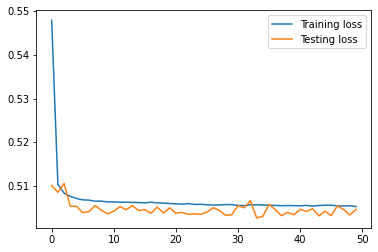

In [ ]:
#now visualize the training and testing loss
plt.plot(trained_model1.history["loss"],label="Training loss")
plt.plot(trained_model1.history["val_loss"],label="Testing loss")
plt.legend()
plt.show()

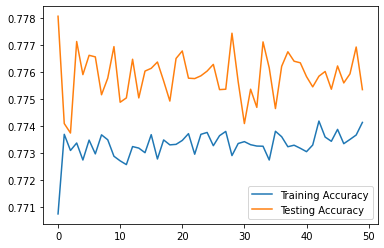

In [ ]:
#now visualize the training and testing loss
plt.plot(trained_model1.history["accuracy"],label="Training Accuracy")
plt.plot(trained_model1.history["val_accuracy"],label="Testing Accuracy")
plt.legend()
plt.show()

In [ ]:
print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.79      0.80      0.80     34215
           1       0.80      0.79      0.79     34215

    accuracy                           0.79     68430
   macro avg       0.79      0.79      0.79     68430
weighted avg       0.79      0.79      0.79     68430

[[27467  6748]
 [ 7349 26866]]


In [ ]:
#aacuracy of this model is 79% which good but not better
